# Ridge regression (L2)

In [47]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
import numpy as np
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [6]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

Text(0.5, 0, 'lambda (penalty value)')

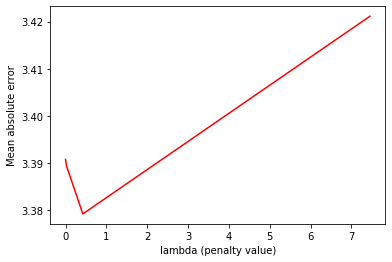

In [50]:
# define model
penalty_arr = np.logspace(-18,2,num=9-2+1,base=2.73)
MAE_arr = []
for penalty in penalty_arr:
    
    model = Ridge(alpha=penalty)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    #print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    MAE_arr.append(mean(scores))

plt.plot(penalty_arr, MAE_arr, color='red')
plt.ylabel('Mean absolute error')
plt.xlabel('lambda (penalty value)')

# Lasso regression (L1)

Text(0.5, 0, 'lambda (penalty value)')

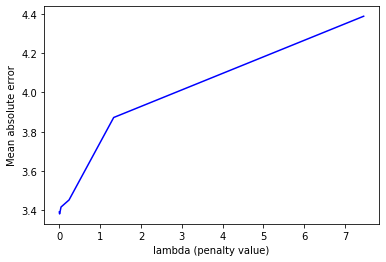

In [60]:
penalty_arr = np.logspace(-10,2,num=9-2+1,base=2.73)
MAE_arr = []
for penalty in penalty_arr:
    
    model = Lasso(alpha=penalty)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    #print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    MAE_arr.append(mean(scores))
    
plt.plot(penalty_arr, MAE_arr, color='blue')
plt.ylabel('Mean absolute error')
plt.xlabel('lambda (penalty value)')